# A Housing Price-prediction Model
### —To support Zillow’s future home price predicion

**Authors**: Daniel Arthur, Sumedh Bhardwaj, Emiko Naomasa

-----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor

from sklearn.feature_selection import RFE



In [2]:
df = pd.read_csv('data/kc_house_data.csv')

df.drop_duplicates(inplace=True)
df.shape

(21597, 21)

In [3]:
df.price.mean()

540296.5735055795

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## 1. Business Understanding 
- Zillow is the most used online real estate site. The current model they use to evaluate the price of homes has a median error rate of 1.9%. However, this error rate increases to 2.3% in Washington. This results in 9.8% of houses being at or above a 10% error rate. This can equate to 10s of thousands of dollars on an individual scale and millions at a company level. 
- Zillow is interested in improving the prediction accuracy of their in-house housing price-prediction model. And we are creating a model to reduce the errors in the Washington area. Having a better model will encourage use of the site and increase revenue. 
- We contracted with Zillow to **(1) develop a prediction model that will help Zillow to predict future home prices** and **(2) Create an inferential model to help potential home buyers to find a house** while balancing their budget constraints and their expectations for a house. This model will be be fed into Zillow’s new online application tool. 

## 2. Data

- We use a dataset on market housing prices for King County, which includes Seattle. It includes the sold prices of houses between May 2014 and May 2015, as well as 20 various housing features, such as the square footage of a living space, the geographical locations of the house, and so on. 
- The total number of observations is 21597. 
- For this project, we limit our analysis to the following 12 variables due to our time constraints.

We cleaned the following 12 variables from the dataset, and we evaluated the outliers, the missed entries of data, and other issues in each variable. 
- **id:** Unique identification (ID) for each sold house 
- **date:** Date the house was sold 
- **price:** Price of the house sold
- **bedrooms:** Number of bedrooms
- **bathrooms:** Number of bathrooms
- **sqft_living:** Square footage of the house’s interior living space
- **sqft_lot:** Square footage of the land space
- **floors:** Number of floors
- **waterfront:** A dummy variable for whether the house is on a waterfront
- **condition:** An index from 1 to 5 on the overall condition of the house. Related to maintenance of house.
- **grade:** An index from 1 to 13 on the grade of the house, where 1 means poor construction and design, and 13 means high quality. It is related to the construction and design of the house.
- **vintage:** House vintage (years) = the year the house was sold - the year the house was built  


In [5]:
# The data covers 2014 & 2015. 
pd.DatetimeIndex(df['date']).year.unique()

Int64Index([2014, 2015], dtype='int64', name='date')

In [6]:
# Drop the following variables (according to the project description). 
drop=['view', 'sqft_above', 'sqft_basement', 'yr_renovated',
      'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Reassigne dataframe
df.drop(labels=drop, axis=1, inplace=True)

In [7]:
# 12 variables, n=21597  
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   date         21597 non-null  object 
 2   price        21597 non-null  float64
 3   bedrooms     21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   sqft_lot     21597 non-null  int64  
 7   floors       21597 non-null  float64
 8   waterfront   19221 non-null  object 
 9   condition    21597 non-null  object 
 10  grade        21597 non-null  object 
 11  yr_built     21597 non-null  int64  
 12  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 2.3+ MB


## 2.1 Data Manipulation

In [8]:
# 5 points statistics 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.0,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,0.5,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,370.0,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.0,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
yr_built,21597.0,1.971000e+03,2.937523e+01,1900.0,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
zipcode,21597.0,9.807795e+04,5.351307e+01,98001.0,9.803300e+04,9.806500e+04,9.811800e+04,9.819900e+04


### Missing variables (waterfront)

In [9]:
# waterfront has 2376 missing variables 
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [10]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [11]:
# convert nan => 'N/A'
df.waterfront = df.waterfront.fillna('N/A')

In [12]:
df.waterfront.unique()

array(['N/A', 'NO', 'YES'], dtype=object)

In [13]:
# zipcode of houses for missing waterfront variables  
waterfront_na = df.loc[df.waterfront=='N/A']
waterfront_na.zipcode.unique()

# from the zipcode, can not tell if 'N/A' = 'NO'

array([98178, 98007, 98030, 98074, 98105, 98166, 98004, 98056, 98058,
       98168, 98118, 98003, 98133, 98177, 98034, 98103, 98126, 98038,
       98040, 98053, 98023, 98052, 98042, 98059, 98117, 98146, 98014,
       98006, 98116, 98033, 98115, 98045, 98019, 98055, 98188, 98024,
       98125, 98198, 98031, 98109, 98002, 98065, 98144, 98199, 98092,
       98102, 98155, 98075, 98011, 98136, 98072, 98008, 98106, 98027,
       98029, 98005, 98070, 98028, 98022, 98108, 98010, 98001, 98112,
       98077, 98107, 98122, 98148, 98119, 98032, 98039])

### Housing price (y)

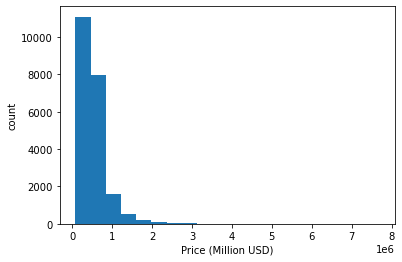

In [14]:
# Outliers skewe the distribution.  
plt.hist(x=df.price, bins=20)

plt.xlabel("Price (Million USD)")
plt.ylabel('count');


In [15]:
print(f'Threshold price for top 1%: {df.price.quantile(0.99)}')
print(f'Threshold price for top 2.5%: {df.price.quantile(0.975)}')
print(f'Threshold price for top 5%: {df.price.quantile(0.95)}')

Threshold price for top 1%: 1970000.0
Threshold price for top 2.5%: 1490000.0
Threshold price for top 5%: 1160000.0


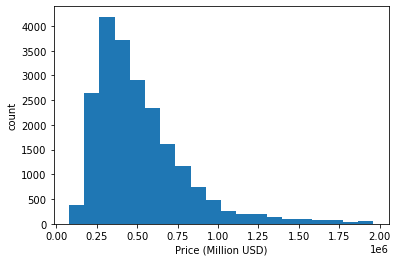

In [16]:
# If we drop top 1% (price >= 1970000), distribution looks less skewed 
x=df.loc[df.price < df.price.quantile(0.99)].price
plt.hist(x=x, bins=20)

plt.xlabel("Price (Million USD)")
plt.ylabel('count');

In [17]:
# Log transformation 
df['price_log']=np.log(df.price)

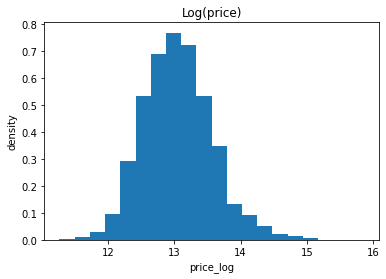

In [18]:
# Distribution of log(price) 

plt.hist(x=df.price_log, bins=20, density=True)
plt.title('Log(price)')
plt.xlabel('price_log')
plt.ylabel('density');

### Dependent Variables (X)

##### Number of Bedrooms

In [19]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [20]:
# Drop outlier (the house with 33 bedrooms)
df = df.loc[df.bedrooms!=33]

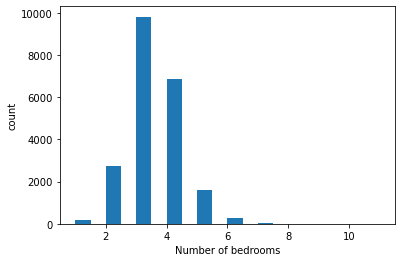

In [21]:
plt.hist(x=df.bedrooms, bins=20)

plt.xlabel('Number of bedrooms')
plt.ylabel('count');

##### Number of Bathrooms

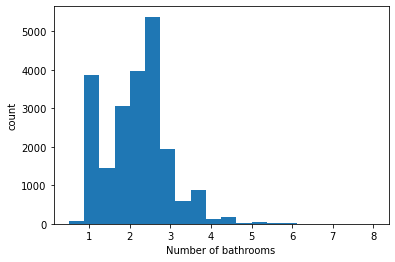

In [22]:
plt.hist(x=df.bathrooms, bins=20)

plt.xlabel('Number of bathrooms')
plt.ylabel('count');

##### Sqft_living

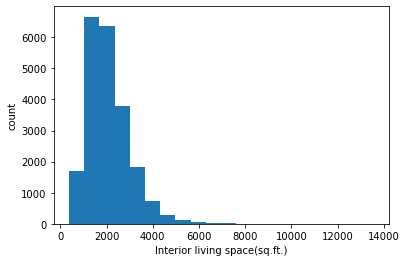

In [23]:
plt.hist(x=df.sqft_living, bins=20)

plt.xlabel('Interior living space(sq.ft.)')
plt.ylabel('count');

In [24]:
print(f'Threshold sqft_living for top 1%: {df.sqft_living.quantile(0.99)}')
print(f'Threshold sqft_living for top 2.5%: {df.sqft_living.quantile(0.975)}')
print(f'Threshold sqft_living for top 5%: {df.sqft_living.quantile(0.95)}')

Threshold sqft_living for top 1%: 4980.0
Threshold sqft_living for top 2.5%: 4270.0
Threshold sqft_living for top 5%: 3760.0


In [25]:
# number of houses which has sqft_living is above 99% threshold 
print(f'Number of houses which sqft_living > 99% threshold: {len(df.loc[df.sqft_living>df.sqft_living.quantile(0.99)])}')

# Average housing price for over 99% threshold sqft 
print (f'Average housing price for over 99% threshold sqft houses: {df.loc[df.sqft_living > df.sqft_living.quantile(0.99)].price.mean()}')


Number of houses which sqft_living > 99% threshold: 215
Average housing price for over 99% threshold sqft houses: 2061799.534883721


##### sqft_lot

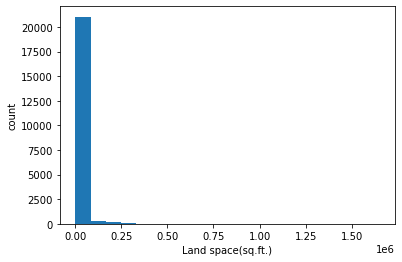

In [26]:
plt.hist(x=df.sqft_lot, bins=20)

plt.xlabel('Land space(sq.ft.)')
plt.ylabel('count');

##### floors

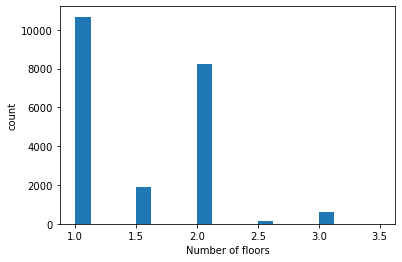

In [27]:
plt.hist(x=df.floors, bins=20)

plt.xlabel('Number of floors')
plt.ylabel('count');


##### House vintage = year of house was sold - year of house was built  

In [28]:
# vintage = year of house was sold - year of house was built  

# year of house was sold 
df['yr_sold']=pd.DatetimeIndex(df['date']).year

# year of house was sold - year of house was built
df['vintage'] = df['yr_sold'] - df['yr_built']



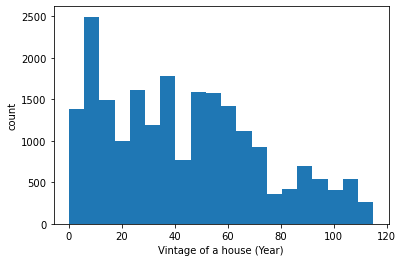

In [29]:
# There are 12 houses which vintage was negative (-1). 
# Since some people purchase houses before it is built, we change negative vintage to 0.  

df.vintage.replace({-1:0}, inplace=True)

plt.hist(x=df.vintage, bins=20)

plt.xlabel('Vintage of a house (Year)')
plt.ylabel('count');

#### categorical variables 

##### condition (categorical value)
- The overall condition of the house. 

In [30]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [31]:
# cond_good = 1 if condition = very good or good. 
df['cond_good'] = (df['condition'] =='Very Good') | ((df.condition =='Good')).astype(int)
df['cond_good']=df['cond_good'].astype(int)

# cond_ave = 1 if condition =average
df['cond_ave'] = (df['condition'] =='Average')
df['cond_ave']=df['cond_ave'].astype(int)

##### grade (categorical value)
- An index from 1 to 13 for a quality of construction and design.

In [32]:
df.grade.value_counts()

7 Average        8973
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [33]:
# convert to numeric value (3(Poor)-13(Mansion))
df['grade'] = df['grade'].str.split().str[0]
df['grade']=df['grade'].astype(int)
df.grade.value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [34]:
## grade_above_average dummy (if grade = [8(Good) - 13(Mansion)], grade_above_average =1)
df['grade_above_ave'] = (df['grade'] > 7).astype(int)
df.grade_above_ave.value_counts()

0    11281
1    10315
Name: grade_above_ave, dtype: int64

##### Waterfront dummy (Yes=1)

In [35]:
df.waterfront.replace({'N/A' : 'N/A_NO' }, inplace = True)

wd = pd.get_dummies(df.waterfront, prefix='waterfront_' , drop_first=False)

wd = wd.waterfront__YES

df = pd.concat([df, wd], axis=1)

df.drop(labels='waterfront', axis=1, inplace =True)

##### Seattle dummy (Seattle = 1)

In [36]:
# Create seattle dummy 
# In a city, sqft is smaller, price is higher. So, relationship between price and other house features will be different between houses in Seattle and houses outside of the city.

# 28 zipcodes for Seattle 
seattle_zipcode=[98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177]

df['seattle'] = [1 if x in seattle_zipcode else 0 for x in df.zipcode]
df.seattle.sum()
# 6297 houses are in seattle 

6951

## 3. EDA

- From the scatter plot figure, we see a linear relationship between housing price and sqft_living, sqft_lot, number of bedrooms, number of bathrooms, and housing grade. Also, the bar chart shows that the mean housing price on a waterfront house is more than three times the mean housing price not on a waterfront. The bar chart also shows a slight difference in the mean housing prices inside and outside of Seattle, but the difference is not as large as the price difference between a waterfront and non-waterfront property is. 



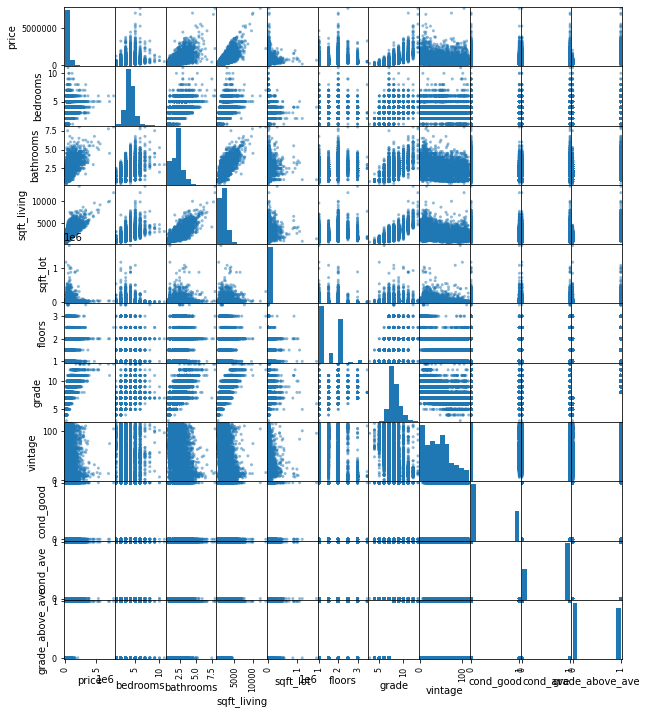

In [37]:
## scatter plot for continuous variables 

cont = df.select_dtypes(('int64', 'float64')).columns.drop(['id', 'yr_built', 'zipcode','seattle', 'yr_sold', 'price_log'])

pd.plotting.scatter_matrix(df[cont], figsize=(10,12));


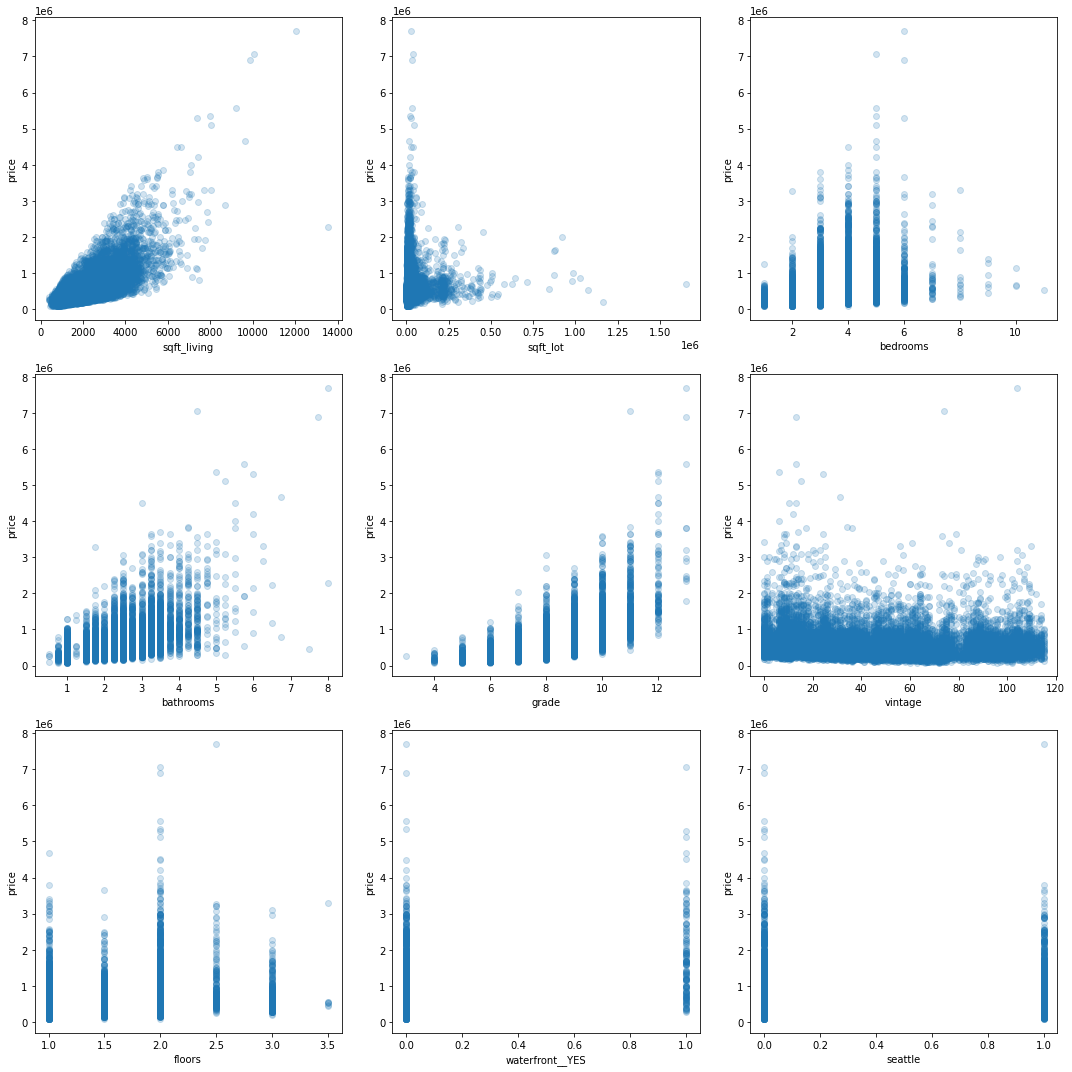

In [38]:
# Plotting X on y 

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
fig.set_tight_layout(True)

xcont = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'grade', 'vintage', 'floors', 'waterfront__YES', 'seattle']

for xcol, ax in zip(xcont, axes.flatten()):
    ax.scatter(df[xcol], df['price'], alpha=0.2)
    ax.set_xlabel(xcol)
    ax.set_ylabel("price")

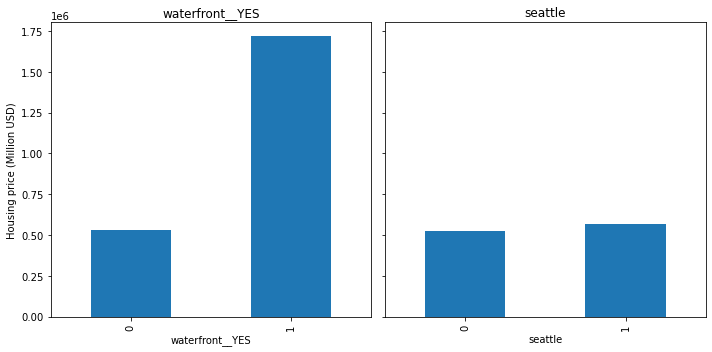

In [39]:
# Bar plots of average housing price by categories. 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10 , 5), sharey=True)

#select datatype=object
cate = df[['waterfront__YES', 'seattle']]

for xcol, ax in zip(cate, axes.flatten()):
    df.groupby(xcol).mean()['price'].sort_values().plot.bar(ax=ax)
    
    ax.set_title(xcol)
    ax.set_ylabel('Housing price (Million USD)')


    
    
fig.tight_layout()

## 4. Model

With the above dataset, we build (1) an inferential model with a linear regression model and (2) a price prediction model using the feature engineering technique. Before going into regression analysis, we first examine the correlation between price (our targeted variable) and other housing features (independent variables), as well as considering the correlation across independent variables. 
- The figures below shows that sqft_living has the highest correlation with housing price followed by grade of housing, number of bathrooms, number of bedrooms, and waterfront dummy follows. However, according to the correlation matrix, sqft_living has very high multicollinearity with other features including the number of bathrooms and grade of housing. So, we limit our focus on the following variables; sqft_living, bedrooms, grade, floors, Seattle (dummy), waterfront (dummy). 

In [40]:
# drop id, date, condition, zipcode from df
df.drop(labels=['id', 'date', 'condition', 'zipcode', 'cond_ave'], axis=1, inplace=True)

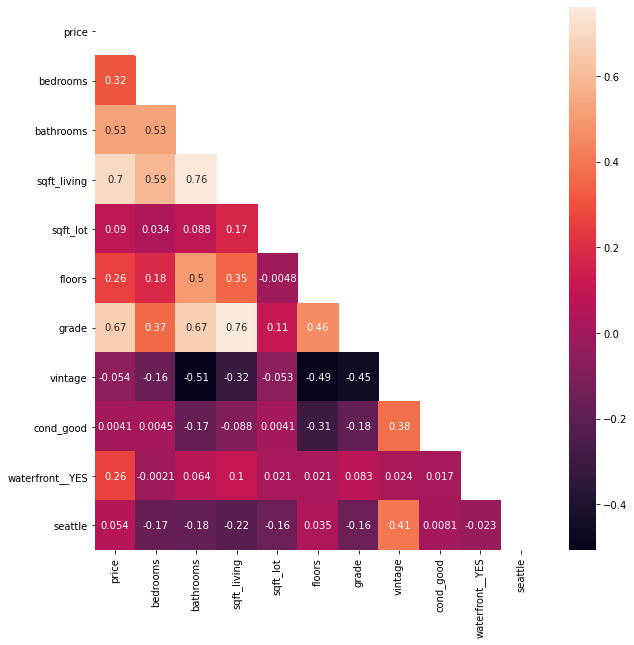

In [41]:
# Correlation Matrix 
corr = df.drop(labels=([ 'price_log', 'yr_sold', 'yr_built', 'grade_above_ave']), axis=1).corr()

# heatmap 
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(data=corr,
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax,
            annot = True,
            );

''

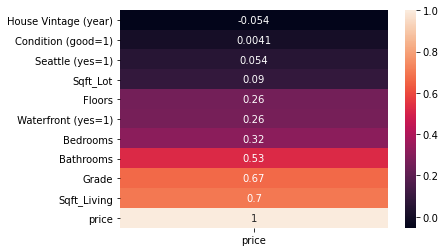

In [42]:
# Correlation between y and X

y_axis_labels = ['House Vintage (year)','Condition (good=1)', 'Seattle (yes=1)','Sqft_Lot', 
                 'Floors', ' Waterfront (yes=1)','Bedrooms', 'Bathrooms', 'Grade' ,'Sqft_Living', 'price'] 
x = corr[['price']]
x = x.sort_values(by='price')
sns.heatmap(x, annot=True, yticklabels= y_axis_labels)
plt.savefig('Image/correlation_X_y')
;

### 4.1 Inferential Model: Model to support customers’ house purchasing decisions
We run seven models with various combinations of variables and with different scales of variables. 


##### Model 1 (Initial Model)

- This initial model includes the most related feature to the house price (squared footage of a house’s living space (sqft_living)) and waterfront dummy, which is another feature strongly related with the housing price but apparently independent of sqft_living. 
- However, the condition number is very large. We expect strong multicollinearity.
- Additional checks show that this model deviates from the linearity assumption, especially in the higher end houses, by over two million areas. The model also failed the normality and homoscedasticity assumptions. As the housing price goes up, the model deviates from the normality assumption, and the residuals of the model vary more. This may be partially explained by extreme outliers in the housing price data. So, for the next model, we exclude the outliers, whose price is in the top 1% of the dataset.

In [43]:
# Model 1 OLS price - sqft_living + waterfront 

formula1 = "price ~ sqft_living + C(waterfront__YES)"
model1 = smf.ols(formula1, df).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                 1.215e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:36:01   Log-Likelihood:            -2.9924e+05
No. Observations:               21596   AIC:                         5.985e+05
Df Residuals:                   21593   BIC:                         5.985e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3.305e+04   4255.467     -7.767      0.000   -4.14e+04   -2.47e+04
C(waterfront__YES)[T.1]  8.651e+05    2.1e+04     41.115      0.000    8.24e+05    9.06e+05
sqft_living               272.7892      1.878    145.251      0.000     269.108     276.470
==============================================================================
Omnibus:                    13414.454   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434850.442
Skew:                           2.469   Prob(JB):                         0.00
Kurtosis:                      24.421   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

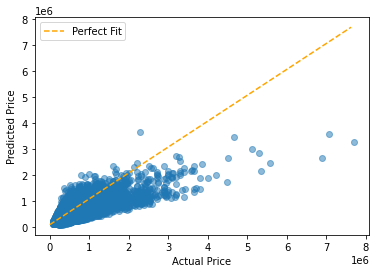

In [44]:
# Linearity check 
x_cols = ['sqft_living', 'waterfront__YES']
preds = model1.predict(df[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df.price.min(), df.price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-45-5117614469fd>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


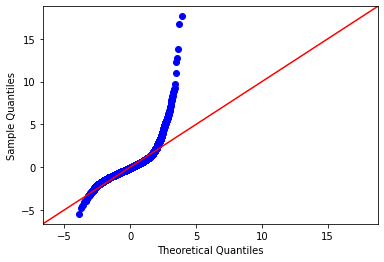

In [45]:
# QQ normality check here
import scipy.stats as stats

residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show();


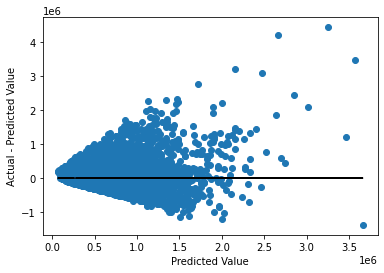

In [46]:
# Homoskedasticity 
plt.figure()
x_cols = ['sqft_living', 'waterfront__YES']
plt.scatter(model1.predict(df[x_cols]), model1.resid)
plt.plot(model1.predict(df[x_cols]), [0 for i in range(len(df))], c='black')

plt.xlabel("Predicted Value")
plt.ylabel("Actual - Predicted Value");


##### Model 2 (Excluding outliers)
- This model dropped the extreme outliers in terms of housing prices. The houses whose prices were above 1.97 million USD (a cutoff point for the top 1% price) were excluded from the dataset. As a result, we dropped 220 samples. 
- The Adj R2 scores was decreased by 0.06. However, this model deviates less from the linearity, normality, and homoskedasticity assumptions. It is still not perfectly linear or normal, but by dropping the extreme outliers, the estimation results from model 2 are more valid than model 1. 
- The condition number is still very large. We expect strong multicollinearity.

In [47]:
# Model 2 (price - sqft_living + waterfront)

df_99 = df.loc[(df.price < df.price.quantile(0.99))]

formula2 = "price ~ sqft_living + C(waterfront__YES)"
model2 = smf.ols(formula2, df_99).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     9666.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:36:06   Log-Likelihood:            -2.9196e+05
No. Observations:               21379   AIC:                         5.839e+05
Df Residuals:                   21376   BIC:                         5.839e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5.827e+04   3646.314     15.980      0.000    5.11e+04    6.54e+04
C(waterfront__YES)[T.1]  4.981e+05   2.06e+04     24.185      0.000    4.58e+05    5.38e+05
sqft_living               223.1547      1.640    136.057      0.000     219.940     226.370
==============================================================================
Omnibus:                     4661.341   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13728.474
Skew:                           1.137   Prob(JB):                         0.00
Kurtosis:                       6.200   Cond. No.                     3.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

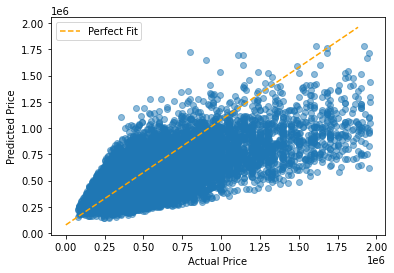

In [48]:
# Linearity check 
x_cols = ['sqft_living', 'waterfront__YES']
preds = model2.predict(df_99[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df_99.price.min(), df_99.price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df_99.price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-49-9062259cc084>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


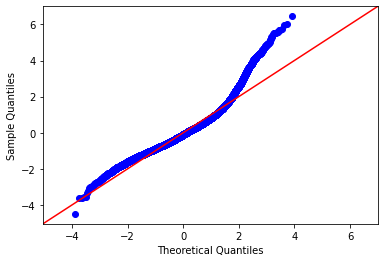

In [49]:
# QQ normality check here
import scipy.stats as stats

residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

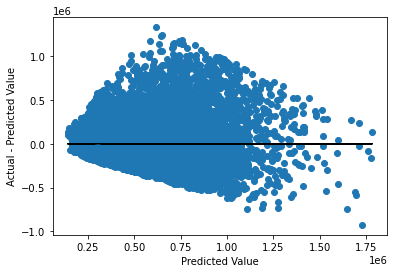

In [50]:
# Homoskedasticity 
plt.figure()
x_cols =  ['sqft_living', 'waterfront__YES']
plt.scatter(model2.predict(df_99[x_cols]), model2.resid)
plt.plot(model2.predict(df_99[x_cols]), [0 for i in range(len(df_99))], c='black')
plt.xlabel("Predicted Value")
plt.ylabel("Actual - Predicted Value");



##### Model 3 
- To avoid strong multicollinearity issues in this dataset, we created a single OLS model with sqft_living. 
- However, the condition number is still large, and the model still alerts the possible multicollinearity issues.
- There is no changes in the adj.R2 score, which is around 0.46.


In [51]:
# Model 3 (price - sqft_living) 

formula3 = "price ~ sqft_living"
model3 = smf.ols(formula3, df_99).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.825e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:36:08   Log-Likelihood:            -2.9225e+05
No. Observations:               21379   AIC:                         5.845e+05
Df Residuals:                   21377   BIC:                         5.845e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.797e+04   3695.754     15.684      0.000    5.07e+04    6.52e+04
sqft_living   224.4500      1.662    135.087      0.000     221.193     227.707
==============================================================================
Omnibus:                     5141.413   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16377.538
Skew:                           1.224   Prob(JB):                         0.00
Kurtosis:                       6.521   Cond. No.                     5.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

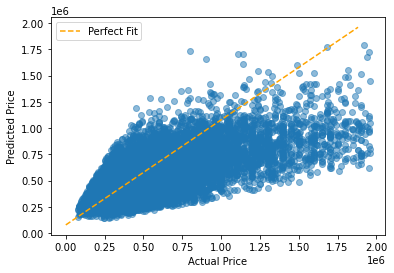

In [52]:
# Linearity check 
x_cols = ['sqft_living']
preds = model3.predict(df_99[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df_99.price.min(), df_99.price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df_99.price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-53-d032dd8917d0>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


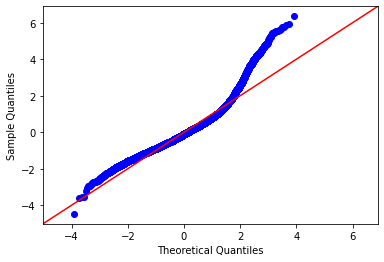

In [53]:
# QQ normality check here
import scipy.stats as stats

residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

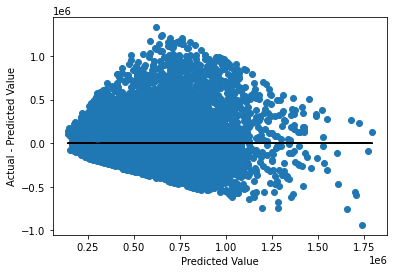

In [54]:
# Homoskedasticity 
plt.figure()
x_cols = ['sqft_living']

plt.scatter(model3.predict(df_99[x_cols]), model3.resid)
plt.plot(model3.predict(df_99[x_cols]), [0 for i in range(len(df_99))], c='black')

plt.xlabel("Predicted Value")
plt.ylabel("Actual - Predicted Value");



##### Model 4

- This model uses the index of housing grade scores as an independent variable and run a single OLS regression.
- The condition number was finally dropped to 53; this model has no multicollinearity issue. 
- Adj R2 score is low (0.463). This model explains only 46.3% of the housing price movement. 

In [55]:
# Model 4 (price - grade)
formula4 = "price ~ grade"
model4 = smf.ols(formula4, df_99).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                 1.845e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:36:09   Log-Likelihood:            -2.9219e+05
No. Observations:               21379   AIC:                         5.844e+05
Df Residuals:                   21377   BIC:                         5.844e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.865e+05   9711.490    -80.991      0.000   -8.06e+05   -7.68e+05
grade       1.711e+05   1259.435    135.834      0.000    1.69e+05    1.74e+05
==============================================================================
Omnibus:                     5792.378   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19440.571
Skew:                           1.361   Prob(JB):                         0.00
Kurtosis:                       6.797   Cond. No.                         53.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

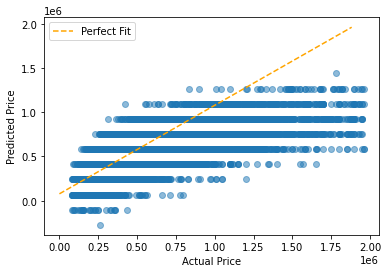

In [56]:
# Linearity check 
x_cols = ['grade']
preds = model4.predict(df_99[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df_99.price.min(), df_99.price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df_99.price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-57-6f65925aae82>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


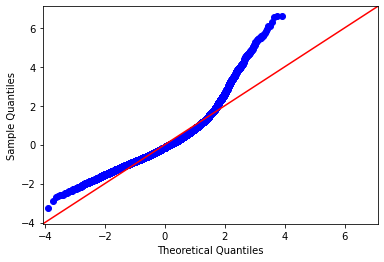

In [57]:
# QQ normality check here
import scipy.stats as stats

residuals = model4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

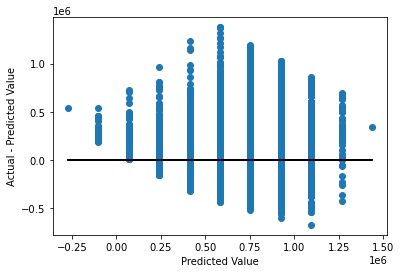

In [58]:
# Homoskedasticity 
plt.figure()
x_cols = ['sqft_living', 'waterfront__YES', 'bedrooms', 'seattle',
         'grade', 'floors', 'vintage', 'cond_good']

plt.scatter(model4.predict(df_99[x_cols]), model4.resid)
plt.plot(model4.predict(df_99[x_cols]), [0 for i in range(len(df_99))], c='black')

plt.xlabel("Predicted Value")
plt.ylabel("Actual - Predicted Value");



##### Model 5
- This model added two more features, waterfront dummy and seattle dummy, to the previous model.
- The Adj. R-squared gradually increased, yet still low. This model explain 51% of the housing price movement. 

In [59]:
# Model 5 (price - seattle + waterfront + grade )
formula5 = "price ~ grade + C(waterfront__YES) + C(seattle)"

model5 = smf.ols(formula5, df_99).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     7530.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:36:11   Log-Likelihood:            -2.9114e+05
No. Observations:               21379   AIC:                         5.823e+05
Df Residuals:                   21375   BIC:                         5.823e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8.802e+05   9571.260    -91.961      0.000   -8.99e+05   -8.61e+05
C(waterfront__YES)[T.1]  5.162e+05   1.98e+04     26.046      0.000    4.77e+05    5.55e+05
C(seattle)[T.1]          1.169e+05   2948.058     39.644      0.000    1.11e+05    1.23e+05
grade                    1.781e+05   1215.863    146.481      0.000    1.76e+05     1.8e+05
==============================================================================
Omnibus:                     5773.507   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20768.689
Skew:                           1.331   Prob(JB):                         0.00
Kurtosis:                       7.029   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

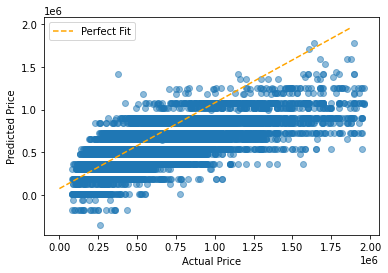

In [60]:
# Linearity check 
x_cols = ['waterfront__YES', 'seattle', 'grade']
preds = model5.predict(df_99[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df_99.price.min(), df_99.price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df_99.price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-61-6fe0fb87884e>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


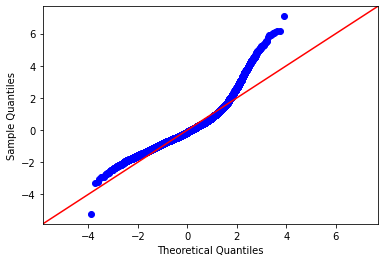

In [61]:
# QQ normality check here
import scipy.stats as stats

residuals = model5.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

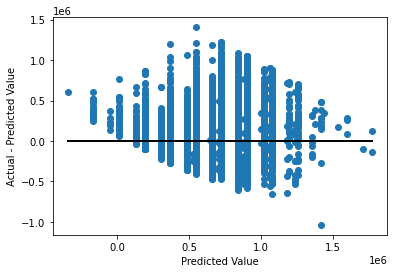

In [62]:
# Homoskedasticity 
plt.figure()
x_cols =  ['waterfront__YES', 'seattle', 'grade']

plt.scatter(model5.predict(df_99[x_cols]), model5.resid)
plt.plot(model5.predict(df_99[x_cols]), [0 for i in range(len(df_99))], c='black')

plt.xlabel("Predicted Value")
plt.ylabel("Actual - Predicted Value");



###### Model 6
- This model uses the log-transformed housing price and log-transformed sqft_living. The Adj. R2 score remains as low as 0.455. 
- The linearity, normality, and homoskedasticity assumptions are strongly held.

In [63]:
# Log transformation 
df['sqft_living_log']=np.log(df.sqft_living)

<AxesSubplot:>

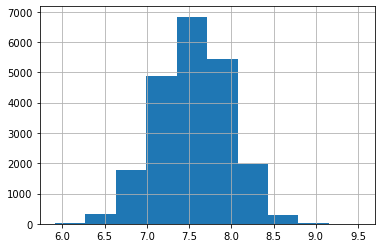

In [64]:
df.sqft_living_log.hist()

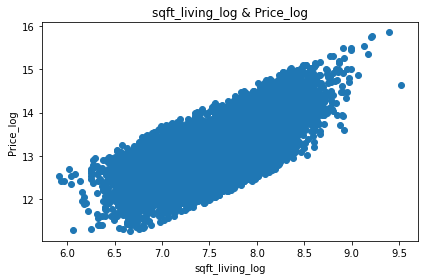

In [65]:
plt.scatter(x = df.sqft_living_log, 
            y = df.price_log)
plt.xlabel("sqft_living_log")
plt.ylabel("Price_log")
plt.title("sqft_living_log & Price_log")
plt.tight_layout()

In [66]:
# OLS (price_log - sqft_living_log)


formula6 = "price_log ~ sqft_living_log" 
#+ C(waterfront__YES) "
model6 = smf.ols(formula6, df).fit()
model6.summary()
#plt.savefig('ols_price_sqft_living')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.806e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:36:13   Log-Likelihood:                -10230.
No. Observations:               21596   AIC:                         2.046e+04
Df Residuals:                   21594   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7232      0.047    142.609      0.000       6.631       6.816
sqft_living_log     0.8377      0.006    134.372      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.586   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.131
Skew:                           0.143   Prob(JB):                     1.65e-25
Kurtosis:                       2.788   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

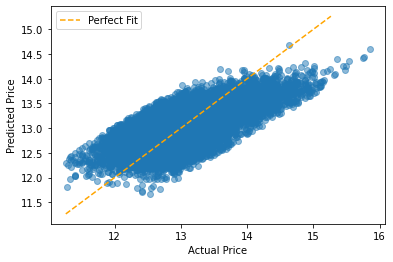

In [67]:
# Linearility check 
x_cols = ['sqft_living_log']
preds = model6.predict(df[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df.price_log.min(), df.price_log.max())
ax.plot( perfect_line, perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.price_log, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-68-991acedb96be>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


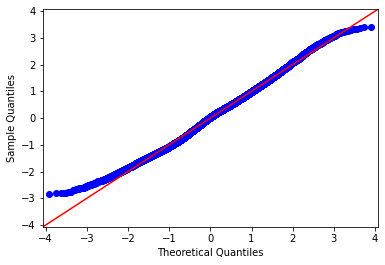

In [68]:
# QQ normality check here
import scipy.stats as stats

residuals = model6.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

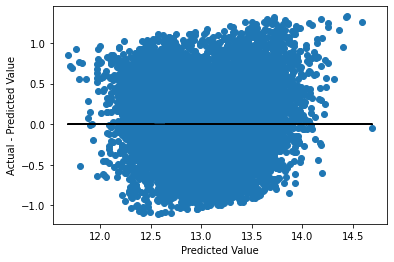

In [69]:
# Homoskedasticity 
plt.figure()
x_cols = ['sqft_living_log', 'waterfront__YES']

plt.scatter(model6.predict(df[x_cols]), model6.resid)
plt.plot(model6.predict(df[x_cols]), [0 for i in range(len(df))], c='black')
plt.xlabel("Predicted Value")
plt.ylabel("Actual - Predicted Value");


##### Model 7
- The model adds other housing features to model 6. The R2 score is 0.602. 
- The coefficient shows that a 1% increase in sqft_living is associated with a (0.83% or 83% ?) increase in the housing price.


This model uses the housing grade index instead of a dummy with an above-average grade.
The R2 score increased to 0.663. However, since the grade index are highly correlated with sqft_living_log, we don't adopt this model.

In [70]:
# Model 7 OLS (price_log - grade) 


formula7 = "price_log ~ grade"
model7 = smf.ols(formula7, df).fit()
model7.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 2.119e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:36:13   Log-Likelihood:                -9408.8
No. Observations:               21596   AIC:                         1.882e+04
Df Residuals:                   21594   BIC:                         1.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6294      0.017    632.296      0.000      10.596      10.662
grade          0.3159      0.002    145.563      0.000       0.312       0.320
==============================================================================
Omnibus:                      130.456   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.880
Skew:                           0.181   Prob(JB):                     8.48e-30
Kurtosis:                       3.131   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

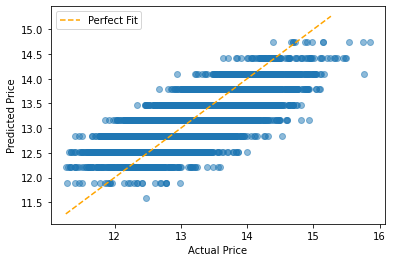

In [71]:
# Linearity check 
x_cols = ['grade']

preds = model7.predict(df[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df.price_log.min(), df.price_log.max())
ax.plot(perfect_line, perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.price_log, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-72-a81195ab4c86>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


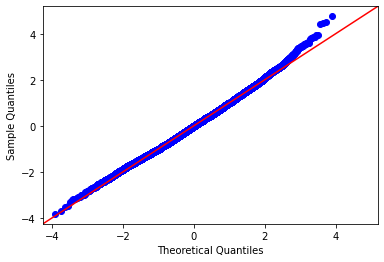

In [72]:
# QQ normality check here
import scipy.stats as stats

residuals = model7.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

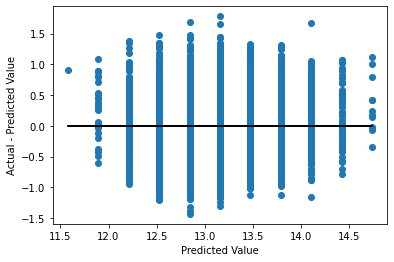

In [73]:
# Homoskedasticity 
plt.figure()
x_cols = ['grade']

plt.scatter(model7.predict(df[x_cols]), model7.resid)
plt.plot(model7.predict(df[x_cols]), [0 for i in range(len(df))], c='black')
plt.xlabel("Predicted Value")
plt.ylabel("Actual - Predicted Value");



####  Model Selection and our final model

We conducted linear regression analysis with seven model specifications. The adjusted R-squared scores in all seven models stayed low, at between 0.4 and 0.5. This tells us that these models, regardless of specification, explain only 40–50% of the entire variation in house prices. This means more than half of the housing price movement is explained by other variables or is captured by types of models other than a linear regression model. 
Additionally, the results report strong multicollinearity issues and violation of the assumptions made for linear regression models.\
\
Because most of the data were related to features of houses, such as the number of bedrooms and size of each house’s living space, each variable was strongly correlated with the others. Models 1–3 displayed strong correlations with each other. Such strong multicollinearity would weaken the statistical inferences from linear regression. Thus, we explored a single linear-regression model. Model 4 runs a single linear regression with a house’s grade in terms of construction and design.\
\
We also checked a regression model with log-transformed price variables. With the log transformation, the model 6 and 7 followed the perfect linearity, normality, and homoscedasticity assumptions. However, the R-squared values were low, and these models only captured half of the price movement.\
\
Given the strong collinearity in the dataset, we decided to choose **Model 4 (a single linear regression model against housing grade)** as our inferential model for the clients. 


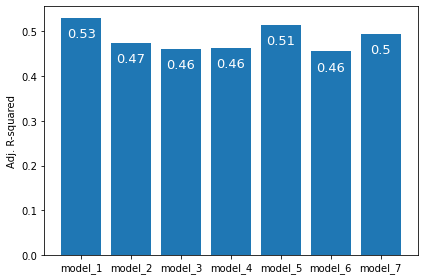

In [74]:
# comparison model's Adj. R2. 

fig = plt.figure()

adjr2=[
model1.rsquared_adj, 
model2.rsquared_adj,
model3.rsquared_adj,
model4.rsquared_adj,
model5.rsquared_adj,
model6.rsquared_adj,
model7.rsquared_adj,
]

model_names = ['model_1', 'model_2', 'model_3', 'model_4', 
                'model_5', 'model_6', 'model_7']

plt.bar(x=model_names, height=adjr2, )
plt.ylabel('Adj. R-squared')
for i in range(len(adjr2)):
    plt.annotate(str(adjr2[i].round(2)), xy=(model_names[i], adjr2[i]-0.05), ha='center', va='bottom', 
                 color ='white', fontsize=13)

plt.savefig('Image/adj_r2')

plt.tight_layout();

**Model 4 (Our inferential model for Zillow)**
- Mode 4 holds no multicollinearity issues. The coefficient of the models indicates that one higher grade is associated with an additional 171,100 USD in housing purchase price. The adjusted R-squared score is the same as those of the other models (0.463). 
- However, the adjusted R-squared score is the same as those of the other models (0.463). It means, this model explains 46% of the housing price variation. It means more than half of the price movement is explained by some other features. We also saw some deviation from the assumptions for linear regressions. In particular, the homoskedasticity and normality assumptions were clearly violated. It indicates that the housing price data does not follow a linear relationship, thus we need different models other than linear regression model. 


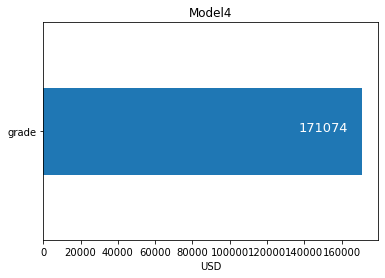

In [75]:
result4 = pd.DataFrame(model4.params)
result4.iloc[1:][0]

y = result4.index[1: ]
width = result4.iloc[1:][0]
plt.barh(y=y, width=width, align='center')
plt.annotate(str(int(model4.params[1])), xy=(width -34000, y), color='white', fontsize=13)
plt.ylim(-1, 1)
plt.xlabel('USD')
plt.title('Model4');

## 4. 2 Predictive Model: Model to support client's price prediction for a new house

##### Baseline Model

In [76]:
dfp = df.drop(labels=(['yr_built', 'yr_sold', 'grade_above_ave', 'sqft_living_log']), axis=1)


In [77]:
y = dfp.price
X = dfp.drop(labels=['price_log', 'price'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17276 4320 17276 4320


In [78]:
# Baseline model 

dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
  
dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)

y_hat_train_mean = dummy_mean.predict(X_train)
y_hat_test_mean = dummy_mean.predict(X_test)

y_hat_train_median = dummy_median.predict(X_train)
y_hat_test_median = dummy_median.predict(X_test)

In [79]:
# R2 score - baseline model (mean) 
print(f"R2 score for baseline model (mean) with train data: {dummy_mean.score(X_train, y_train)}")
print(f"R2 score for baseline model (mean) with test data: {dummy_mean.score(X_test, y_test)}")


R2 score for baseline model (mean) with train data: 0.0
R2 score for baseline model (mean) with test data: -0.00015839521795513178


In [80]:
# MSE - baseline model (mean) 
train_mse_mean = mean_squared_error(y_train, y_hat_train_mean)
test_mse_mean = mean_squared_error(y_test, y_hat_test_mean)
print('Train Mean Squarred Error (mean model):', train_mse_mean)
print('Test Mean Squarred Error (mean model):', test_mse_mean)

Train Mean Squarred Error (mean model): 135941436748.43039
Test Mean Squarred Error (mean model): 131033764077.49681


In [81]:
# RMSE - baseline model (mean) 
train_rmse_mean = mean_squared_error(y_train, y_hat_train_mean, squared=False)
test_rmse_mean = mean_squared_error(y_test, y_hat_test_mean, squared=False)
print('Train Root Mean Squarred Error (mean model):', train_rmse_mean)
print('Test Root Mean Squarred Error (mean model):', test_rmse_mean)

Train Root Mean Squarred Error (mean model): 368702.368786031
Test Root Mean Squarred Error (mean model): 361985.8617093999


In [82]:
# R2 score - baseline model (median)
print(f"R2 score for baseline model (median) with train data: {dummy_median.score(X_train, y_train)}")
print(f"R2 score for baseline model (median) with test data: {dummy_median.score(X_test, y_test)}")


R2 score for baseline model (median) with train data: -0.06118829957449967
R2 score for baseline model (median) with test data: -0.057306061068561176


In [83]:
# MSE - baseline model (median) 
train_mse_median = mean_squared_error(y_train, y_hat_train_median)
test_mse_median = mean_squared_error(y_test, y_hat_test_median)
print('Train Mean Squarred Error (median model):', train_mse_median)
print('Test Mean Squarred Error (median model):', test_mse_median)

Train Mean Squarred Error (median model): 144259462104.78125
Test Mean Squarred Error (median model): 138520851923.23355


In [84]:
# RMSE - baseline model (median) 
train_mse_median = mean_squared_error(y_train, y_hat_train_median, squared=False)
test_mse_median = mean_squared_error(y_test, y_hat_test_median, squared=False)
print('Train Root Mean Squarred Error (median model):', train_mse_median)
print('Test Root Mean Squarred Error (median model):', test_mse_median)

Train Root Mean Squarred Error (median model): 379815.0367017889
Test Root Mean Squarred Error (median model): 372183.89530342864


##### Model with All Numeric Features

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

print(f"R2 score with train data: {lr.score(X_train, y_train)}")
print(f"R2 score with test data: {lr.score(X_test, y_test)}")


R2 score with train data: 0.6594511182110319
R2 score with test data: 0.6511246845393517


In [86]:
train_mse_model1 = mean_squared_error(y_train, y_hat_train)
test_mse_model1 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse_model1)
print('Test Mean Squarred Error:', test_mse_model1)

Train Mean Squarred Error: 46294704273.46372
Test Mean Squarred Error: 45707205975.68022


In [87]:
train_rmse_model1 = mean_squared_error(y_train, y_hat_train, squared=False)
test_rmse_model1 = mean_squared_error(y_test, y_hat_test, squared=False)
print('Train Root Mean Squarred Error:', train_rmse_model1)
print('Test Root Mean Squarred Error:', test_rmse_model1)

Train Root Mean Squarred Error: 215162.0418974121
Test Root Mean Squarred Error: 213792.43666622124


##### Model with Selected Features

Using **Feature Ranking with Recursive Feature Elimination**, we select the most important features.

In [88]:
# Scale the data to normalize the coefficients
X_train_for_RFE = StandardScaler().fit_transform(X_train)

model_for_RFE = LinearRegression()

# Instantiate and fit the selector
selector = RFE(model_for_RFE)
selector.fit(X_train_for_RFE, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: False
bathrooms: False
sqft_living: True
sqft_lot: False
floors: False
grade: True
vintage: True
cond_good: False
waterfront__YES: True
seattle: True


In [89]:
# Use the selected columns 
selectedcolumns = X_train.columns[selector.support_]

model_for_RFE.fit(X_train[selectedcolumns],y_train)

y_hat_train_RFE = model_for_RFE.predict(X_train[selectedcolumns])
y_hat_test_RFE = model_for_RFE.predict(X_test[selectedcolumns])


print(f"R2 score with train data: {model_for_RFE.score(X_train[selectedcolumns], y_train)}")
print(f"R2 score with test data: {model_for_RFE.score(X_test[selectedcolumns], y_test)}")


R2 score with train data: 0.6503702546249508
R2 score with test data: 0.6431680619915359


In [90]:
train_mse_model2 = mean_squared_error(y_train, y_hat_train_RFE)
test_mse_model2 = mean_squared_error(y_test, y_hat_test_RFE)
print('Train Mean Squarred Error:', train_mse_model2)
print('Test Mean Squarred Error:', test_mse_model2)


Train Mean Squarred Error: 47529169916.27208
Test Mean Squarred Error: 46749627062.949104


In [91]:
train_rmse_model2 = mean_squared_error(y_train, y_hat_train_RFE,  squared=False)
test_rmse_model2 = mean_squared_error(y_test, y_hat_test_RFE,  squared=False)
print('Train Root Mean Squarred Error:', train_rmse_model2)
print('Test Root Mean Squarred Error:', test_rmse_model2)

Train Root Mean Squarred Error: 218011.85728366263
Test Root Mean Squarred Error: 216216.62069079958


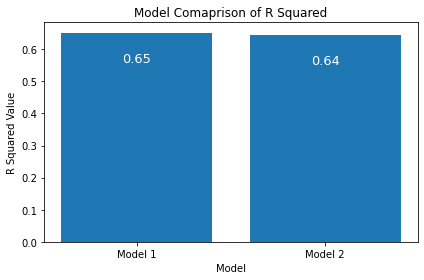

In [92]:

fig = plt.figure()


r1 = lr.score(X_test, y_test)
r2 = model_for_RFE.score(X_test[selectedcolumns], y_test) 

xr2= [r1, r2]
model_names=['Model 1', 'Model 2']

plt.bar(x=model_names, height=xr2)
plt.title('Model Comaprison of R Squared')
plt.xlabel('Model')
plt.ylabel('R Squared Value')


for i in range(len(xr2)):
    plt.annotate(str(xr2[i].round(2)), xy=(model_names[i], xr2[i]-0.1), ha='center', va='bottom', color ='white',
                fontsize=13)

plt.savefig('Image/r2_prediction')
 
plt.tight_layout();

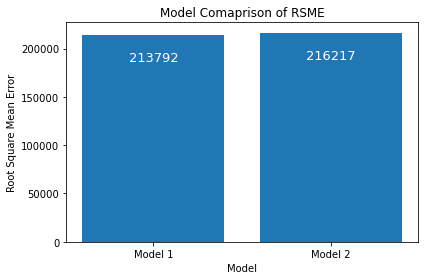

In [93]:
fig = plt.figure()

rsme1 = lr.score(X_test, y_test)
rsme2 = model_for_RFE.score(X_test[selectedcolumns], y_test)


x1rsme=[ test_rmse_model1, test_rmse_model2]
model_names=['Model 1', 'Model 2']

plt.bar(x=model_names, height=x1rsme)
plt.title('Model Comaprison of RSME')
plt.xlabel('Model')
plt.ylabel('Root Square Mean Error')
#for index,data in enumerate():
#    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))


for i in range(len(x1rsme)):
    plt.annotate(str(int(x1rsme[i].round(0))), xy=(model_names[i], x1rsme[i]-30000), ha='center', va='bottom', color ='white', fontsize=13)

plt.savefig('Image/rsme_prediction')    
    
plt.tight_layout();

- RMSE from Model 1 = 213790. It means that for an average housing, this algorithm will be off by about 214,000(USD). 
- RMSE from Model 2 = 216216. It means that for an average housing, this algorithm will be off by about 216,000(USD). 
- Given that average housing price for this dataset is about 540,000(USD), the error captures almost half of the price. Depending only on this algorithm is not recommended. 

## 5. Conclusion and next steps